# Plot the Results of SA with $N_\text{tot} =4N_\text{bit}^2 + 1$  and $N_\text{bit} =16$  

In [1]:
from functions_SFMA import *
np.set_printoptions(threshold=10, linewidth=9999)

In [2]:
# Variables of files
n_bit = 16 # number of spins (qubits)
val_dim = f'd{n_bit}'
n_in = n_bit # sizes of the initial datasets 
kFM = int(n_bit/2)-1 # hyperparameter for FM models 
val_k = str(kFM)
val_nonstandard = "nonstandard"
val_standard = "standard"
val_anneal = 'SA'
n_samp = 30 # number of sampling of SFMA
val_samp = f'samp{n_samp}'
nrep_it = 2 # prefactor of iterations of SFMA (FMA)
n_it = pow(n_bit,2) # unit of the number of iterations of FMA (SFMA)
n_it_tot = int(n_it*nrep_it) # total number of the iterations
n_tot = n_in + 1 + n_it_tot # sizes of the final datasets
val_n_tot = str(n_tot)
nrep_it_ext = 2 # prefactor of the extended number of iterations of SFMA 
n_it_tot_ext = int(n_it*nrep_it_ext) # number of extra iterations of SFMA 
n_tot_ext = n_tot + n_it_tot_ext # sizes of the final extended datasets 
val_n_tot_ext = str(n_tot_ext)
l_rate = n_tot_ext - n_bit # sizes of the extended rates

# Labels and colors for plots
list_label = ["NS-FMA", "NS-SFMA (R=0.4)","S-FMA", "S-SFMA (R=0.4)","ISFMA","RS"] # labels of the algorithms 
list_color = ["green", "orange", "blue", "red", "purple", "tan"] # colors for plots
list_W = [2,5,7] # indices of the W matrices
#
l_percent_W = [] # list for ratios for the W matrices
#
ratio_W_2 = 0.1 # ratio for W_2
int_ratio_W_2 = int(ratio_W_2*100) # convert the ratio to a percentage
val_percent_W_2 = f'percent_{int_ratio_W_2}'
l_percent_W.append(val_percent_W_2)
#
ratio_W_5 = 0.1 # ratio for W_5
int_ratio_W_5 = int(ratio_W_5*100) # convert the ratio to a percentage
val_percent_W_5 = f'percent_{int_ratio_W_5}'
l_percent_W.append(val_percent_W_5)
#
ratio_W_7 = 0.1 # ratio for W_7
int_ratio_W_7 = int(ratio_W_7*100) # convert the ratio to a percentage
val_percent_W_7 = f'percent_{int_ratio_W_7}'
l_percent_W.append(val_percent_W_7)


# Specify the folders for saving the figures of the results.
folder_data =  f'final_data_file_{n_bit}' # folder for the inital and output datasets 
folder_mean = f'final_SFMA_results_ext_mean_{n_bit}_SA' # folder for the plots of mean
folder_rate = f'final_SFMA_results_ext_rate_{n_bit}_SA' # folder for the plots of success rate

# font sizes
x_fontsize = 18
y_fontsize = 18
title_fontsize = 18
legend_fontsize = 16

## Plot the results of mean for $W_2,W_5$, and $W_7$

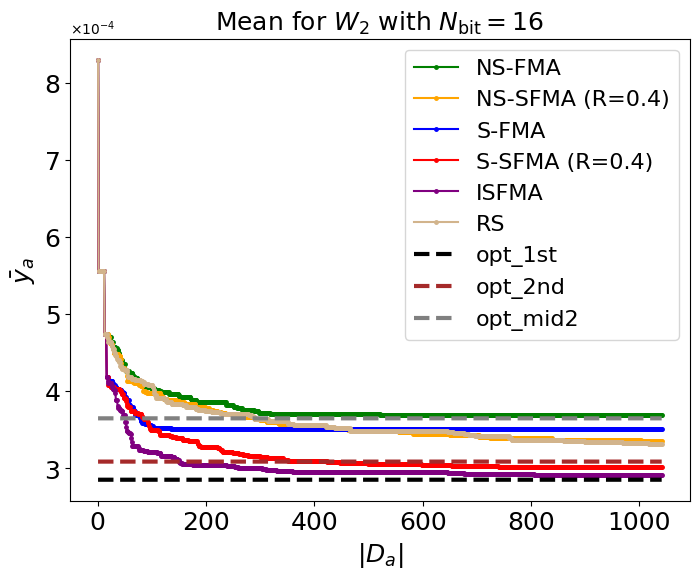

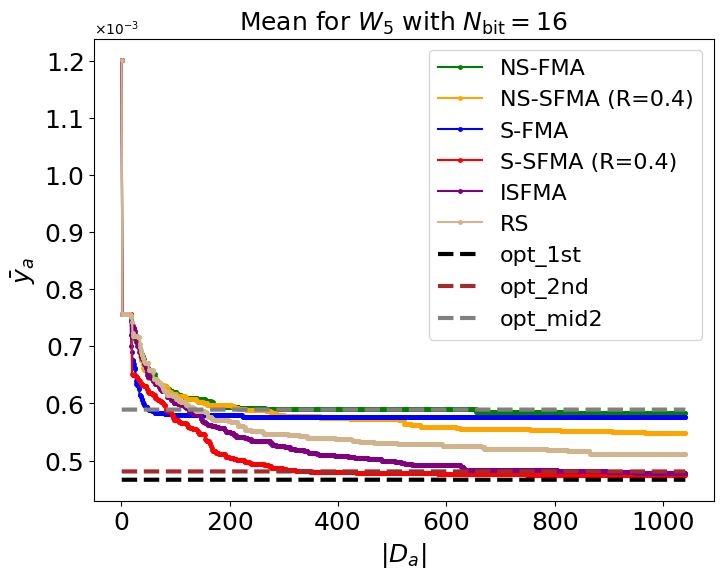

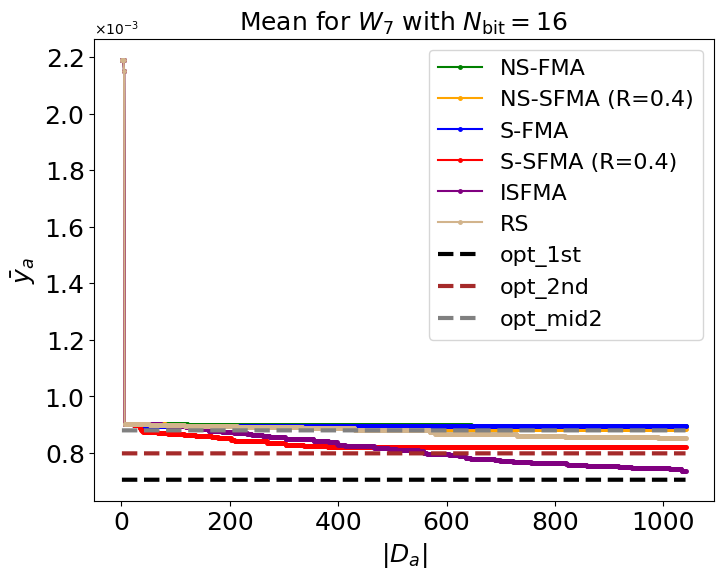

In [3]:
# Load the files and plot the results.
for n_W in range(len(list_W)): # setup for each W matrix
    ele_W = list_W[n_W] # index of the W matrix
    val_num_W = f'W_{ele_W}'
    val_percent = l_percent_W[n_W]
    ######### Load the non-standardized results.
    file_nonstandard = f'{folder_data}/extended_result_{val_num_W}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot}_{val_n_tot_ext}_{val_nonstandard}.bz2'
    with open(file_nonstandard, 'rb') as fl_nonstandard:
        result_nonstandard = pickle.load(fl_nonstandard)
    ######### Load the standardized results.
    file_standard = f'{folder_data}/extended_result_{val_num_W}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot}_{val_n_tot_ext}_{val_standard}.bz2'
    with open(file_standard, 'rb') as fl_standard:
        result_standard = pickle.load(fl_standard)
    ######### Load the standardized results with R=0.1.
    file_standard_singleR = f'{folder_data}/singleR_result_{val_num_W}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot_ext}_{val_standard}_{val_percent}.bz2'
                                                                             
    with open(file_standard_singleR, 'rb') as fl_standard_singleR:
        result_standard_singleR = pickle.load(fl_standard_singleR)
    ######### Load the RS results.
    file_RS = f'{folder_data}/ext_RS_result_{val_num_W}_{val_dim}_{val_n_tot}_{val_n_tot_ext}.bz2'
    with open(file_RS, 'rb') as fl_RS:
        result_RS = pickle.load(fl_RS)
    
    ######### Rounded means (17 decimal places)  
    ys_mean_full_nonstandard = result_nonstandard['ys_mean_full_rounded'] # full, non-standardized 
    ys_mean_sub_nonstandard = result_nonstandard['ys_mean_sub_rounded'] # sampled (R=0.4), non-standardized 
    ys_mean_full_standard = result_standard['ys_mean_full_rounded'] # full, standardized 
    ys_mean_sub_standard = result_standard['ys_mean_sub_rounded'] # sampled (R=0.4), standardized
    ys_mean_singleR_standard = result_standard_singleR['ys_mean_rounded'] # sampled (R=0.1), standardized
    ys_min_RS = result_RS['ys_mean_rounded'] # RS
    opt_1st = result_standard['opt_1st_rounded'] # opt_1st 
    opt_2nd = result_standard['opt_2nd_rounded'] # opt_2nd 
    opt_mid2 = result_standard['opt_mid2_rounded'] # opt_mid2 

    #### Plot means.
    list_mean = [ys_mean_full_nonstandard,ys_mean_sub_nonstandard,ys_mean_full_standard,ys_mean_sub_standard,ys_mean_singleR_standard,ys_min_RS] # list of means
                 
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    for a in range(len(list_mean)):
        ax.plot(
        range(1, n_tot_ext+1),
        list_mean[a],
        marker=".",
        markersize = 5,
        linestyle="-",
        label=list_label[a],
        color=list_color[a]
        )
    ax.plot(
        range(1, n_tot_ext+1),
        opt_1st,
        linewidth=3,
        linestyle="--",
        label='opt_1st',
        color="black",
        )
    ax.plot(
        range(1, n_tot_ext+1),
        opt_2nd,
        linewidth=3,
        linestyle="--",
        label='opt_2nd',
        color="brown",
        )
    ax.plot(
        range(1, n_tot_ext+1),
        opt_mid2,
        linewidth=3,
        linestyle="--",
        label='opt_mid2',
        color="grey",
        )

    

    ax.set_xlabel('$|D_a|$', fontsize=x_fontsize)
    ax.set_ylabel(r'$\bar{y}_a$', fontsize=y_fontsize)
    ax.set_title(rf'Mean for $W_{ele_W}$ with $N_{{\mathrm{{bit}}}} = {n_bit }$', fontsize=title_fontsize)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci',  axis='y',scilimits=(0,0))
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=legend_fontsize)
    
    # Create the result file and save it in the specified folder.
    
    file_path_mean = os.path.join(folder_mean, f'ext_mean_{val_num_W}_{n_bit}_{val_anneal}.png')# save the figure as a png file
    os.makedirs(folder_mean, exist_ok=True) # create the folder if it doesn't exist
    fig.savefig(file_path_mean, format='png', bbox_inches='tight')  # save the figure as a png file in the specified folder
   


## Plot the results of rounded success rates for $W_2,W_5$, and $W_7$

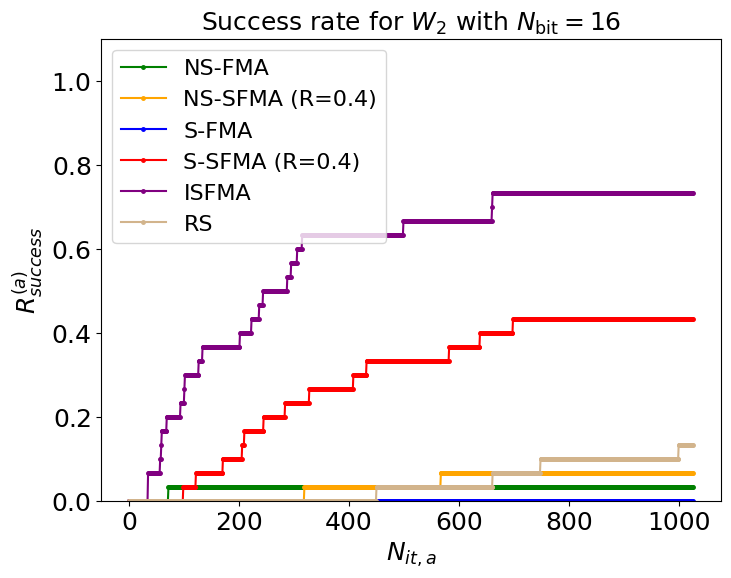

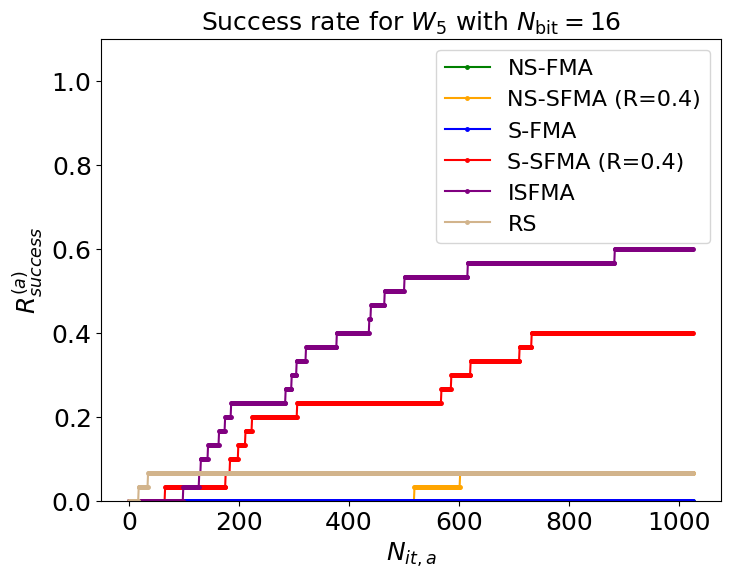

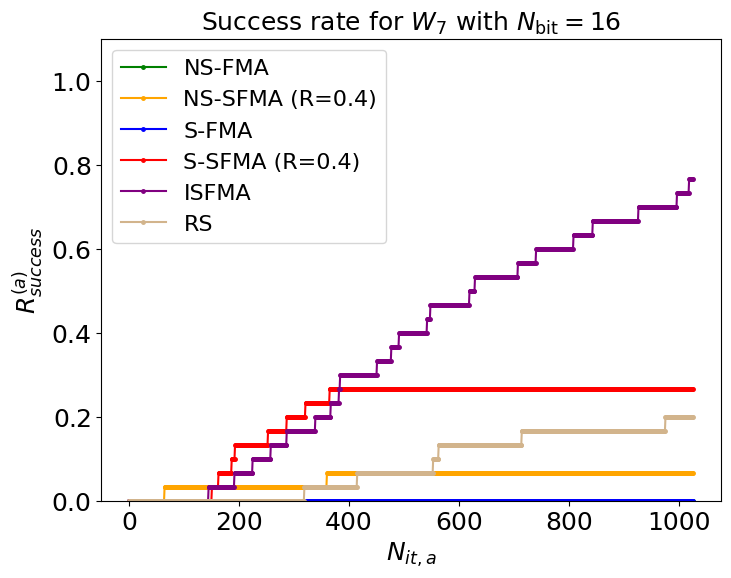

In [4]:
# Prepare lists for collecting the rates for the W Matrices. 
l_rate_full_nonstandard = [] # list for rates (full, non-standardized)
l_rate_sub_nonstandard = [] # list for rates (sampled (R=0.4), non-standardized)
l_rate_full_standard = [] # list for rates (full, standardized)
l_rate_sub_standard = [] # list for rates (sampled (R=0.4), standardized)
l_rate_singleR_standard = [] # list for rates (sampled (R=0.1), standardized)
l_rate_RS = [] # list for rates (RS)

# Load the files and plot the success rates.
for n_W in range(len(list_W)): # setup for each W matrix
    ele_W = list_W[n_W] # index of the W matrix
    val_num_W = f'W_{ele_W}'
    val_percent = l_percent_W[n_W]
    ######### Load the non-standardized results.
    file_nonstandard = f'{folder_data}/extended_result_{val_num_W}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot}_{val_n_tot_ext}_{val_nonstandard}.bz2'
    with open(file_nonstandard, 'rb') as fl_nonstandard:
        result_nonstandard = pickle.load(fl_nonstandard)
    ######### Load the standardized results.
    file_standard = f'{folder_data}/extended_result_{val_num_W}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot}_{val_n_tot_ext}_{val_standard}.bz2'
    with open(file_standard, 'rb') as fl_standard:
        result_standard = pickle.load(fl_standard)
    ######### Load the standardized results with R=0.1.
    file_standard_singleR = f'{folder_data}/singleR_result_{val_num_W}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot_ext}_{val_standard}_{val_percent}.bz2'
                                                                             
    with open(file_standard_singleR, 'rb') as fl_standard_singleR:
        result_standard_singleR = pickle.load(fl_standard_singleR)
    ######### Load the RS results.
    file_RS = f'{folder_data}/ext_RS_result_{val_num_W}_{val_dim}_{val_n_tot}_{val_n_tot_ext}.bz2'
    with open(file_RS, 'rb') as fl_RS:
        result_RS = pickle.load(fl_RS)
    
    #########  Rounded success rates (17 decimal places)   
    rate_full_nonstandard = result_nonstandard['rate_full_rounded'] # full, non-standardized
    l_rate_full_nonstandard.append(rate_full_nonstandard) # append the rate_full_nonstandard to l_rate_full_nonstandard
    rate_sub_nonstandard = result_nonstandard['rate_sub_rounded'] # sampled (R=0.4), non-standardized
    l_rate_sub_nonstandard.append(rate_sub_nonstandard) # append the rate_sub_nonstandard to l_rate_sub_nonstandard
    rate_full_standard  = result_standard['rate_full_rounded'] # full, standardized
    l_rate_full_standard .append(rate_full_standard) # append the rate_full_standard to l_rate_full_standard
    rate_sub_standard  = result_standard['rate_sub_rounded'] # sampled (R=0.4), standardized
    l_rate_sub_standard .append(rate_sub_standard) # append the rate_sub_standard to l_rate_sub_standard
    rate_singleR_standard = result_standard_singleR['rate_rounded'] # sampled (R=0.1), standardized
    l_rate_singleR_standard.append(rate_singleR_standard) # append the rate_singleR_standard to l_rate_singleR_standard
    rate_RS  = result_RS['rate'] # RS
    l_rate_RS.append(rate_RS) # append the rate_RS to l_rate_RS
    
    #### Plot success rates.

    list_rate = [rate_full_nonstandard,rate_sub_nonstandard,rate_full_standard,rate_sub_standard,rate_singleR_standard,rate_RS] # list of rates

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    for a in range(len(list_rate)):
        ax.plot(
        range(1, l_rate+1),
        list_rate[a],
        marker=".",
        markersize = 5,
        linestyle="-",
        label=list_label[a],
        color=list_color[a]
        )
    
    plt.ylim(0, 1.1)
    ax.set_xlabel('$N_{it,a}$', fontsize=x_fontsize)
    ax.set_ylabel('$R_{success}^{(a)} $', fontsize=y_fontsize)
    ax.set_title(rf'Success rate for $W_{ele_W}$ with $N_{{\mathrm{{bit}}}} = {n_bit}$', fontsize=title_fontsize)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci',  axis='y',scilimits=(0,0))
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=legend_fontsize)

    # Create the result file and save it in the specified folder.
    file_path_rate = os.path.join(folder_rate, f'ext_success_rate_{val_num_W}_{n_bit}_{val_anneal}.png') # save the figure as a png file
    os.makedirs(folder_rate, exist_ok=True) # create the folder if it doesn't exist
    fig.savefig(file_path_rate, format='png', bbox_inches='tight') # save the figure as a png file in the specified folder

    
    



## Analyze N_conv and the final success rates for $W_2,W_5,$ and $W_7$

In [5]:
# Print N_conv.
print('N_conv:')
for n_W in range(len(list_W)):
    ele_W = list_W[n_W] # index of the W matrix
    val_number_W = f'W_{ele_W}'
    N_conv_full_nonstandard = find_min_location(l_rate_full_nonstandard[n_W], 0.5) # full, non-standardized
    N_conv_sub_nonstandard = find_min_location(l_rate_sub_nonstandard[n_W], 0.5) # sampled (R=0.4), non-standardized
    N_conv_full_standard = find_min_location(l_rate_full_standard[n_W], 0.5) # full, standardized
    N_conv_sub_standard = find_min_location(l_rate_sub_standard[n_W], 0.5) # sampled (R=0.4), standardized
    N_conv_singleR_standard = find_min_location(l_rate_singleR_standard[n_W], 0.5) # sampled (R=0.1), standardized
    N_conv_RS = find_min_location(l_rate_RS[n_W], 0.5) # RS
    
    print(val_number_W, 
           list_label[4],N_conv_singleR_standard,
          list_label[3],N_conv_sub_standard,
            list_label[2], N_conv_full_standard,
          list_label[1], N_conv_sub_nonstandard, 
          list_label[0],N_conv_full_nonstandard,
         list_label[5],N_conv_RS
         )

# Print final rates.
print('final rate:')
for n_W in range(len(list_W)):
    ele_W = list_W[n_W] # index of the W matrix
    val_number_W = f'W_{ele_W}'
    print(val_number_W,
          list_label[4],l_rate_singleR_standard[n_W][l_rate-1]*n_samp,
        list_label[3],l_rate_sub_standard[n_W][l_rate-1]*n_samp,
        list_label[2],l_rate_full_standard[n_W][l_rate-1]*n_samp,
         list_label[1],l_rate_sub_nonstandard[n_W][l_rate-1]*n_samp,
         list_label[0],l_rate_full_nonstandard[n_W][l_rate-1]*n_samp,
        list_label[5],l_rate_RS[n_W][l_rate-1]*n_samp
         )

N_conv:
W_2 ISFMA 243 S-SFMA (R=0.4) None S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_5 ISFMA 464 S-SFMA (R=0.4) None S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_7 ISFMA 618 S-SFMA (R=0.4) None S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
final rate:
W_2 ISFMA 22.0 S-SFMA (R=0.4) 13.0 S-FMA 0.0 NS-SFMA (R=0.4) 2.0 NS-FMA 1.0 RS 4.0
W_5 ISFMA 18.0 S-SFMA (R=0.4) 12.0 S-FMA 0.0 NS-SFMA (R=0.4) 2.0 NS-FMA 0.0 RS 2.0
W_7 ISFMA 23.0 S-SFMA (R=0.4) 8.0 S-FMA 0.0 NS-SFMA (R=0.4) 2.0 NS-FMA 0.0 RS 6.0
